#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling <br> Date Updated: 01/18/2022

In [1]:
# Logistic Regression

In [2]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [3]:
cd "C:/Dhruv/Data/4_Machine_Learning_with_Python/3_Supervised Learning Essential Training/Phase II - Modelling_v3_01.18.2022/1_Logistic_Regression"

C:\Dhruv\Data\4_Machine_Learning_with_Python\3_Supervised Learning Essential Training\Phase II - Modelling_v3_01.18.2022\1_Logistic_Regression


In [4]:
# Load Cryotherapy Data

does = pd.read_csv("1_readonly/Services.csv", sep = ',', header = 0)

In [5]:
does.head()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
0,40,0,1,1,11,0,0,0,0,0,0,1
1,40,0,1,1,11,0,0,0,0,0,0,1
2,50,0,1,1,14,0,0,0,1,0,0,0
3,50,0,1,1,14,0,0,0,1,0,0,0
4,53,0,1,1,14,0,0,0,1,0,0,0


In [24]:
does.describe()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
count,38158.000000,38158.000000,38158.000000,38158.000000,38158.000000,38158.000000,38158.000000,38158.000000,38158.000000,38158.000000,38158.000000,38158.000000
mean,35.635437,0.043582,1.450731,1.047146,14.744326,0.017742,0.014781,0.004770,0.867498,0.002097,0.027019,0.281409
std,12.954811,0.204166,0.499466,0.297194,3.622182,0.132014,0.120675,0.068899,0.339040,0.045741,0.162142,0.449692
min,14.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,2.000000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,83.000000,1.000000,2.000000,4.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Check for missing data
total = does.isnull().sum().sort_values(ascending=False)
print(total)

Employed                0
Race_White              0
Race_PacificIslander    0
Race_AfricanAmerican    0
Race_Asian              0
Race_NativeAmerican     0
Race_Hispanic           0
EducationLevel          0
CitizenStatus           0
Gender                  0
Disability              0
Age_AtReg               0
dtype: int64


In [8]:
print(does.shape)

(38263, 12)


In [9]:
# does.drop(cryo.columns[[0,1,2]], axis = 1, inplace = True)

In [10]:
# does.head()

In [11]:
# Creating Array of Features
X = does.iloc[:,:11]
X.head()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White
0,40,0,1,1,11,0,0,0,0,0,0
1,40,0,1,1,11,0,0,0,0,0,0
2,50,0,1,1,14,0,0,0,1,0,0
3,50,0,1,1,14,0,0,0,1,0,0
4,53,0,1,1,14,0,0,0,1,0,0


In [12]:
# Create Target Array
Y = does.iloc[:,-1]
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: Employed, dtype: int64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=23)

In [14]:
# Create Logistic Regression Classifier
classifier = LogisticRegression(solver='lbfgs',random_state=234)
classifier

LogisticRegression(random_state=234)

In [15]:
# Fit Classifier on Cryotherapy Data
classifier.fit(X_train, Y_train)

C:\Users\drewn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=234)

In [16]:
# Testing Classifier with our remaining data
predicted_y = classifier.predict(X_test)
print(predicted_y)

[0 0 0 ... 0 0 0]


In [17]:
# View customers who will probably respond positively to does services

for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x)
        
# this is supposed to print customers we predict success for 

In [18]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.72


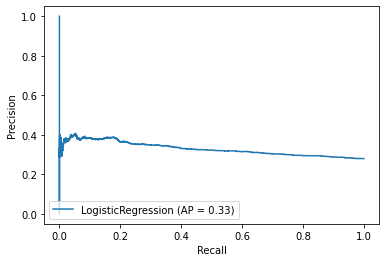

In [19]:
plot_precision_recall_curve(classifier, X_test, Y_test)


In [20]:
# View Metrics
print('Accuracy = {:.5f}'.format(accuracy_score(Y_test, predicted_y)))
print('Precision = {:.5f}'.format(precision_score(Y_test, predicted_y)))
print('Recall = {:.5f}'.format(recall_score(Y_test, predicted_y)))
print('F1 score = {:.5f}'.format(f1_score(Y_test, predicted_y)))

print('\nClassification Report')
print(classification_report(Y_test, predicted_y))

Accuracy = 0.71998
Precision = 0.00000
Recall = 0.00000
F1 score = 0.00000

Classification Report
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     11020
           1       0.00      0.00      0.00      4286

    accuracy                           0.72     15306
   macro avg       0.36      0.50      0.42     15306
weighted avg       0.52      0.72      0.60     15306



C:\Users\drewn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\drewn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


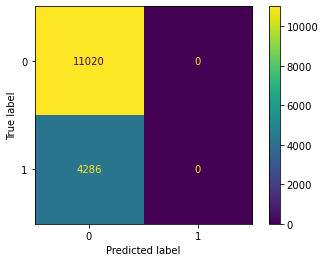

In [21]:
# Print Confusion Matrix

plot_confusion_matrix(classifier, X_test, Y_test)